<a href="https://colab.research.google.com/github/phycoding/Feynnlabs/blob/main/EVMarket_Segmentation_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/phycoding/Feynnlabs/main/data.csv")

In [ ]:
import numpy as np 
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
from google.colab import files


%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer




from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


## Read the data

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [ ]:
# Importing consumer buying behavior study dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/phycoding/Feynnlabs/main/Indian%20automoble%20buying%20behavour%20study%201.0.csv')
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

In [ ]:
df1.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [ ]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,0.747573,4.883495,55811.563107,4643.522050
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.436529,0.795834,34134.665280,2840.004151
min,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1674.732800
25%,5.100000,150.000000,250.000000,168.000000,260.000000,0.500000,5.000000,34429.500000,2864.534400
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,3744.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000,5408.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,17888.000000


In [ ]:
# Observing unique value for object dtype columns
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',df1[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [ ]:
# Observing Column entries
for col in df1.columns:
  print(df1[col].value_counts())

36    13
35    10
31     8
41     7
34     7
27     6
37     6
42     5
30     5
39     4
44     4
29     4
51     3
49     3
28     3
43     2
33     2
32     2
45     2
46     1
50     1
26     1
Name: Age, dtype: int64
Salaried    64
Business    35
Name: Profession, dtype: int64
Married    84
Single     15
Name: Marrital Status, dtype: int64
Post Graduate    56
Graduate         43
Name: Education, dtype: int64
3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64
No     67
Yes    32
Name: Personal loan, dtype: int64
No     62
Yes    37
Name: House Loan, dtype: int64
Yes    52
No     46
m       1
Name: Wife Working, dtype: int64
1400000    17
900000      8
1800000     7
2700000     6
1300000     6
1100000     6
1600000     5
1900000     5
2200000     5
800000      4
2000000     4
3100000     4
1200000     3
1700000     3
2400000     3
2900000     2
2100000     2
1500000     2
2500000     2
200000      1
2600000     1
2300000     1
2800000     1
3800000     1
Name: Sala

In [ ]:
df1.loc[df1['Wife Working'] == 'm']
df1=df1.replace(to_replace ="m", value ="No")
df1.loc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

#Behavioral and Psychographic Analysis

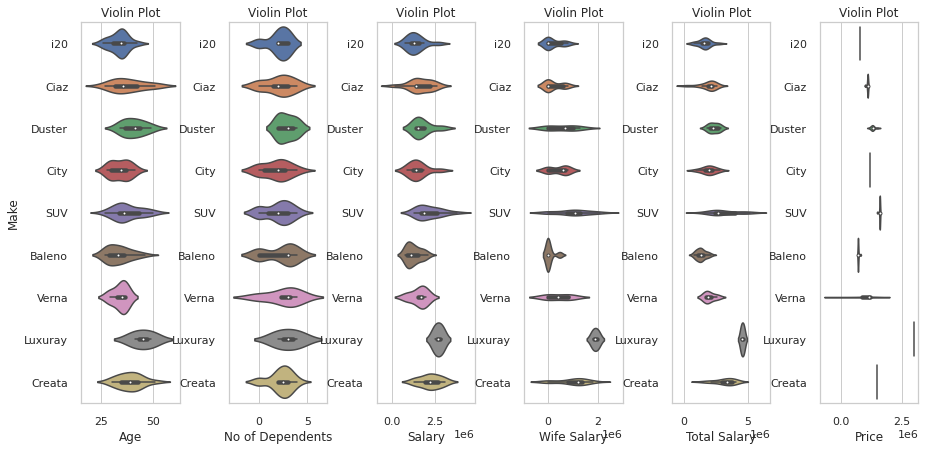

In [ ]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Make', data=df1)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

***Observations:***


*   <u>Age</u>: Younger consumers purchase less expensive vehicles.
*   <u>Number of Dependents</u>: Greater number of dependents makes the consumer buy a vehicle with more seats and so they prefer SUVs.
*   <u>Salary</u>: If you overlap the normalised salary plots with price plot, you would observe the median of salary violin plot matches that of the price of the vehicle indicating a very direct relationship.

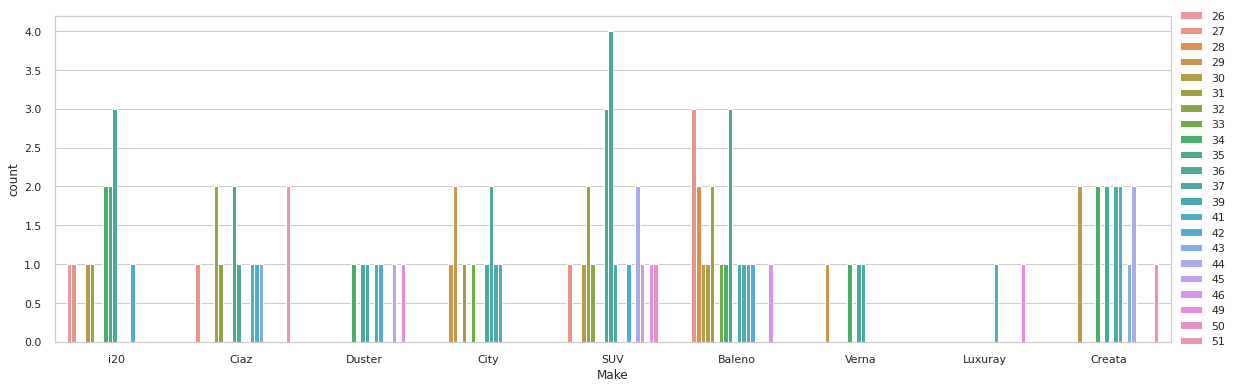

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df1, hue="Age")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

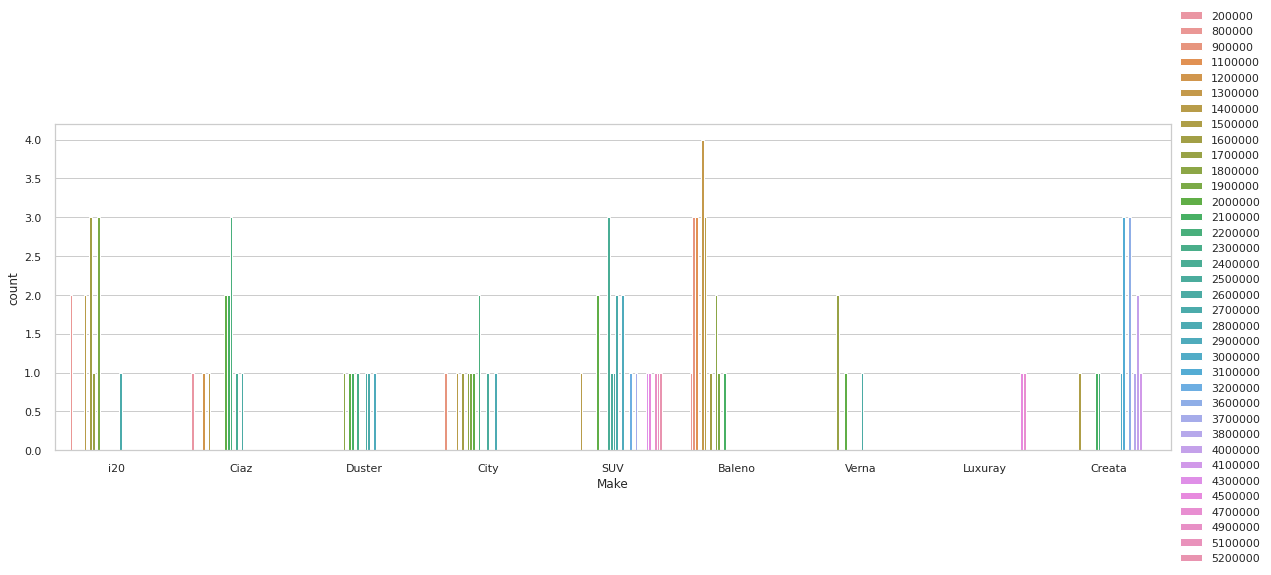

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

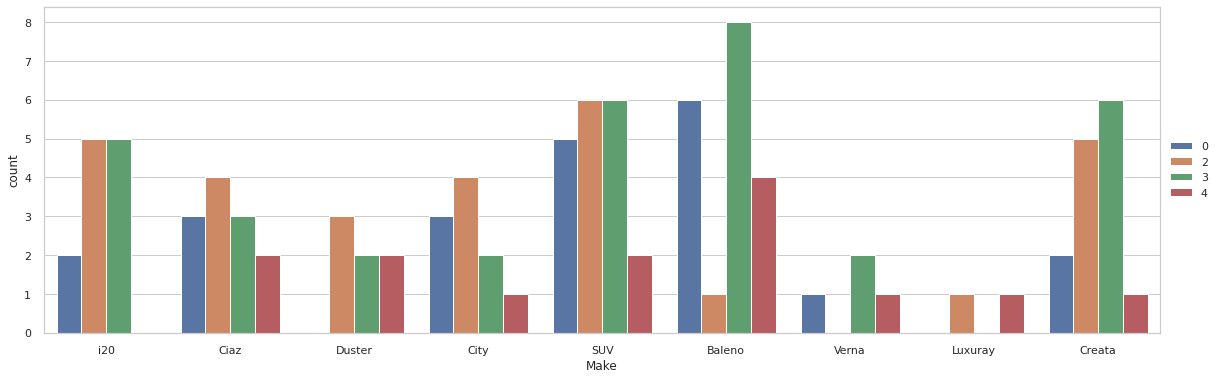

In [ ]:
#Make of vehicles they tend to purchase
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

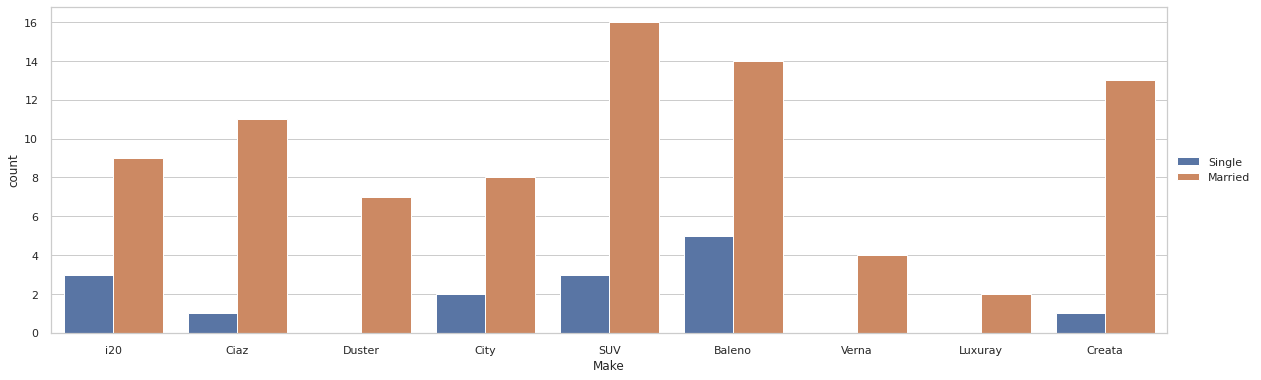

In [ ]:
# Relation between consumers' marital status and the vehicles they tend to purchase
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

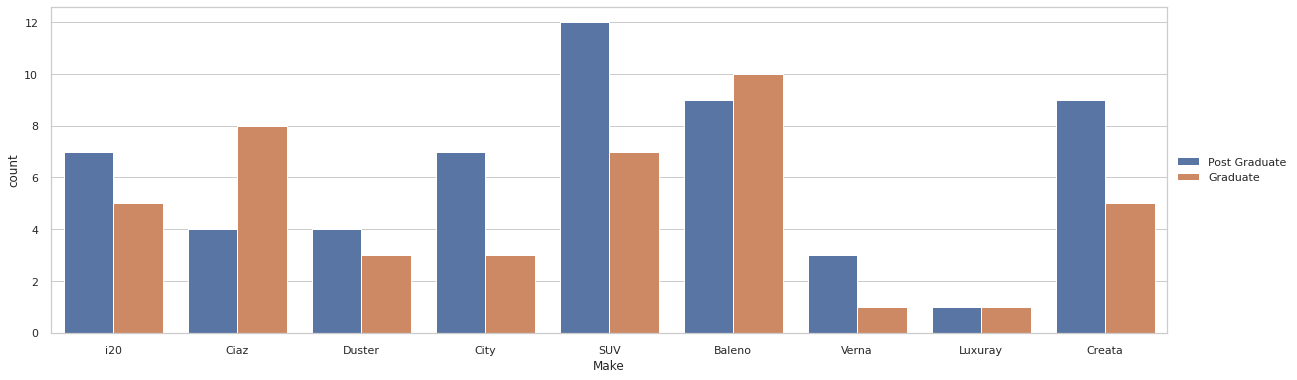

In [ ]:
#Relation between consumers education and the vehicles they tend to purchase
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df1, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Demographic Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

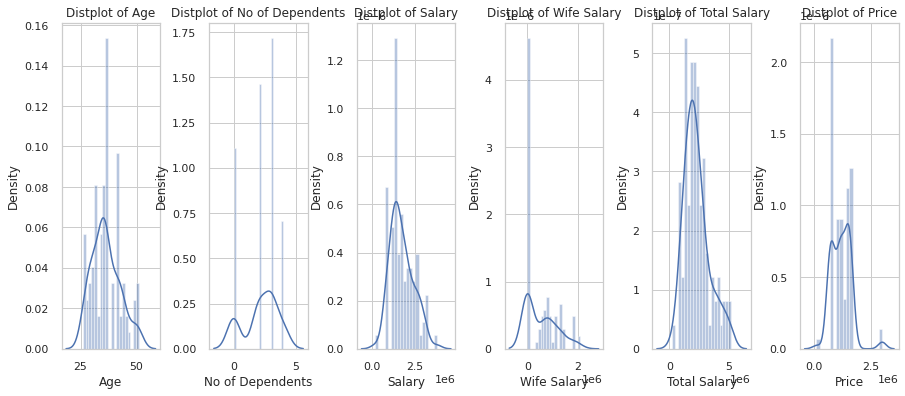

In [ ]:
# Plotting for int64 dtype columns

plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

Observations:

People between the age group of 25 to 50 create the most of the consumer market.
Most people having an average total salary of around 30 lakh tend to purchase vehicles more.
Most people spent around 10 to 20 lakhs for vehicles.

#Geographic analysis

In [110]:
# Importing state-wise sales dataset
data = pd.read_csv('https://raw.githubusercontent.com/phycoding/Feynnlabs/main/EVStats.csv')
data.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


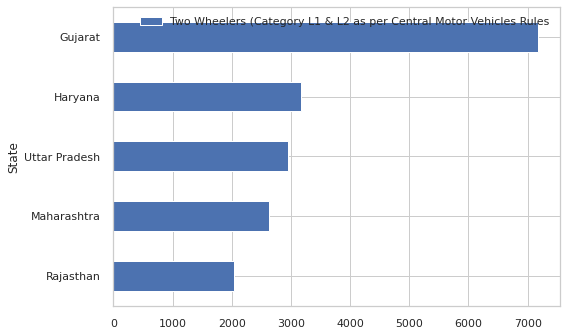

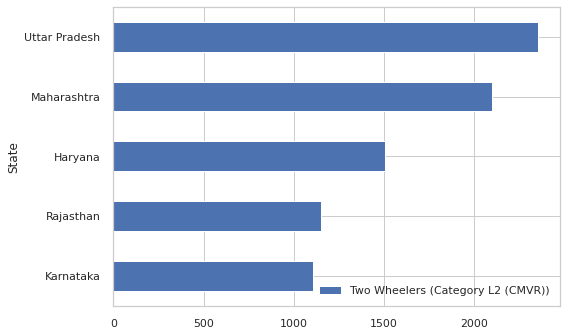

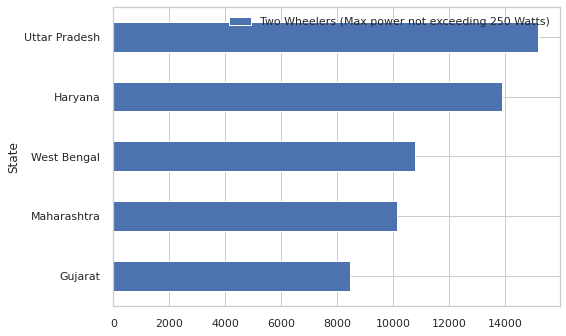

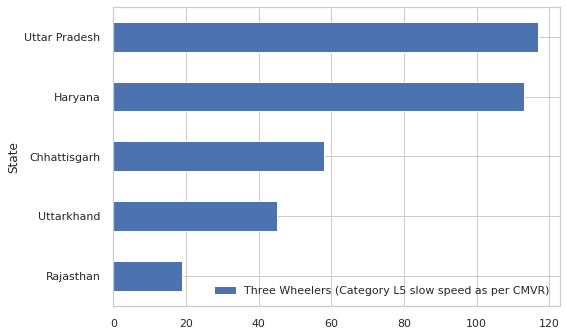

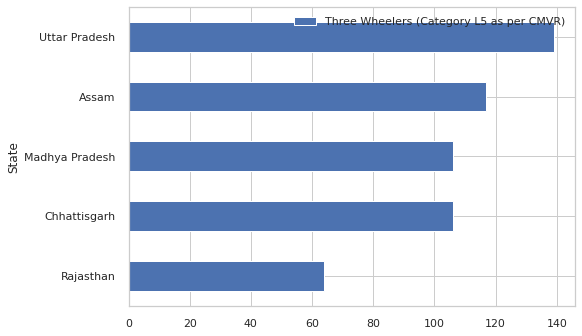

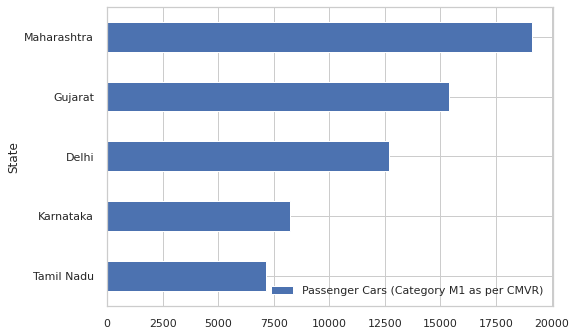

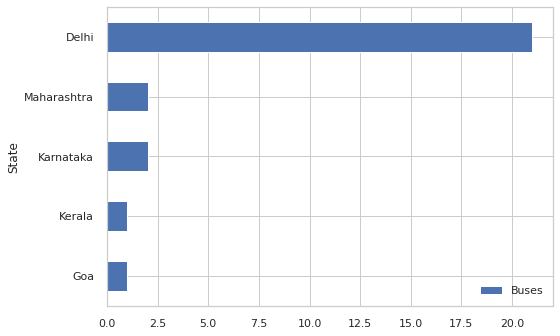

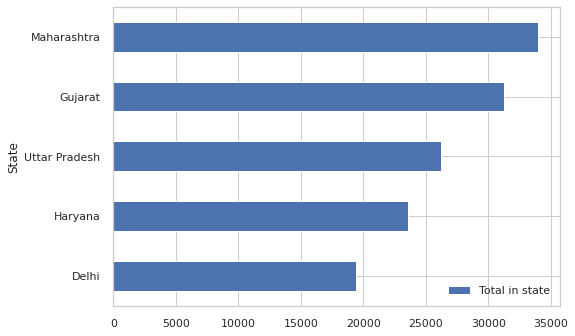

In [ ]:
# Top 5 states for each category of Electric Vehicles
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax = data.sort_values(y, ascending=True).tail(5).plot.barh(x='State', y=y)

Observations: Based on the type of electric vehicle, states with higher number of electric vehicle can be targeted as people in these states are more likely to purchase them.

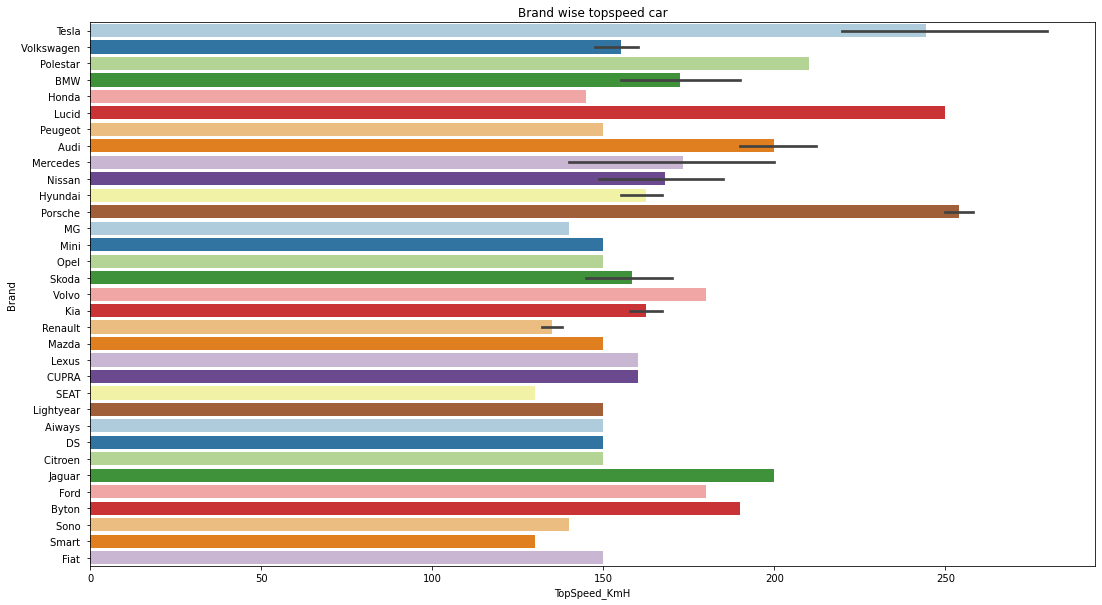

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (18,10))
sns.barplot(y = df['Brand'], x = df['TopSpeed_KmH'],palette='Paired')
plt.title("Brand wise topspeed car")
plt.show()


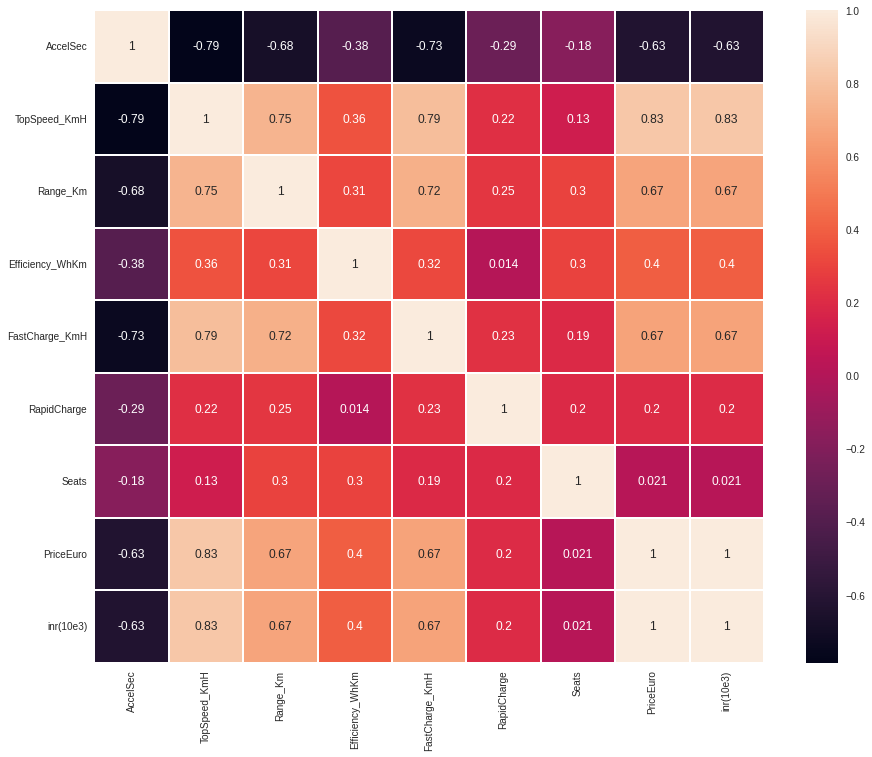

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)
plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Brand wise fastest accelaration',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

##Pairplot of all the columns based on Rapid Charger presence

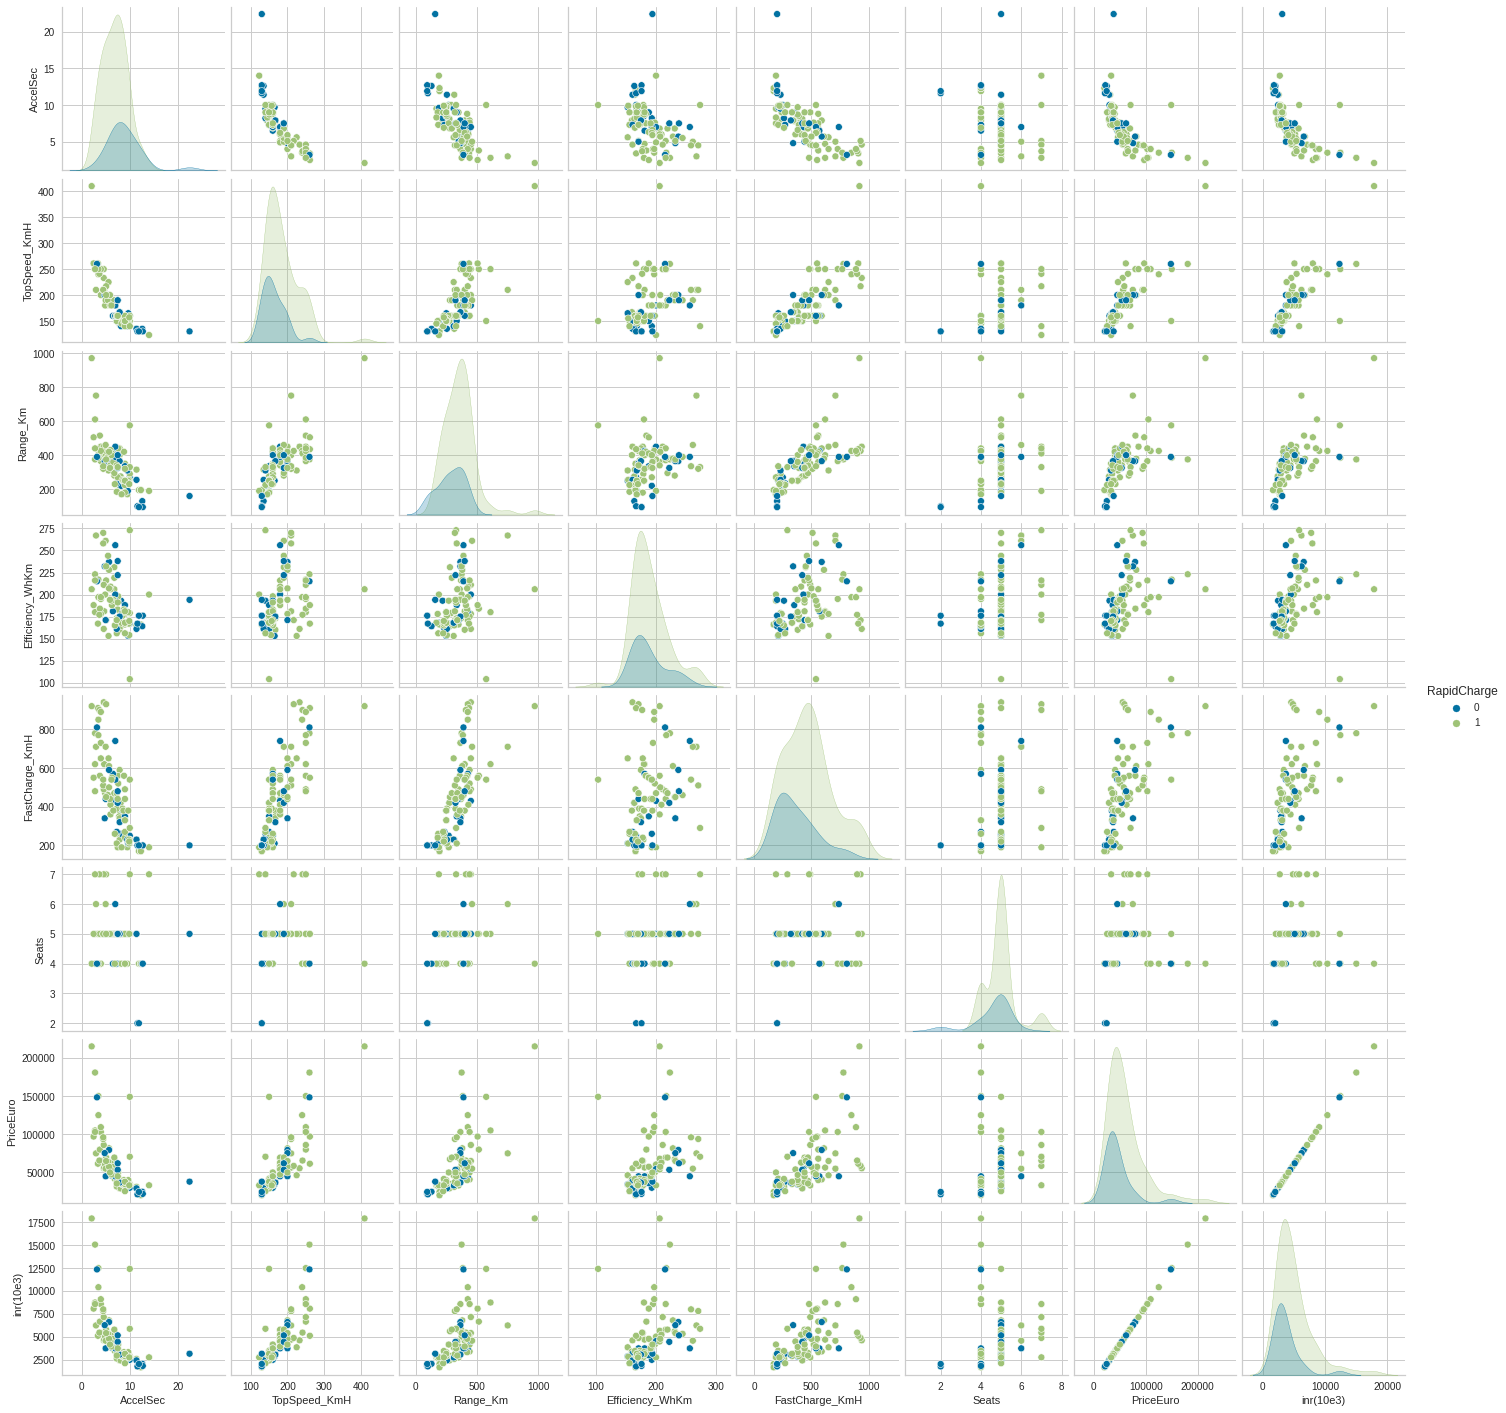

In [ ]:
sns.pairplot(df,hue='RapidCharge')

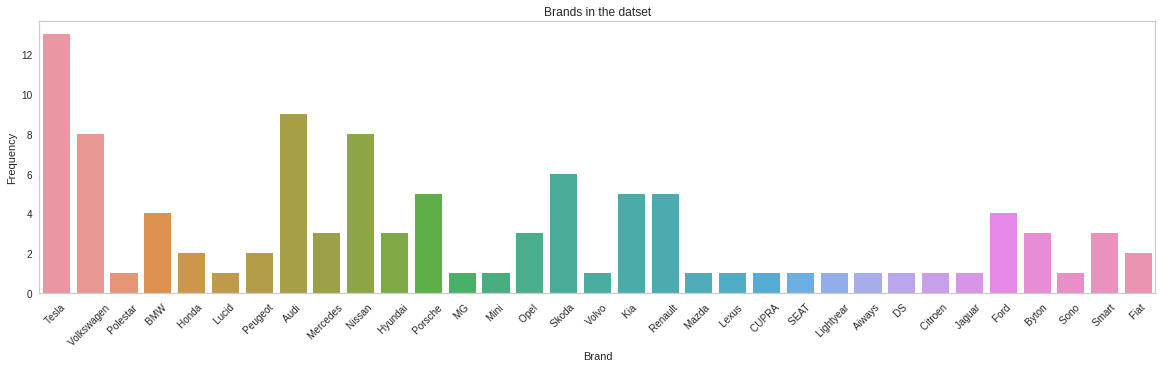

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.countplot(x='Brand',data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

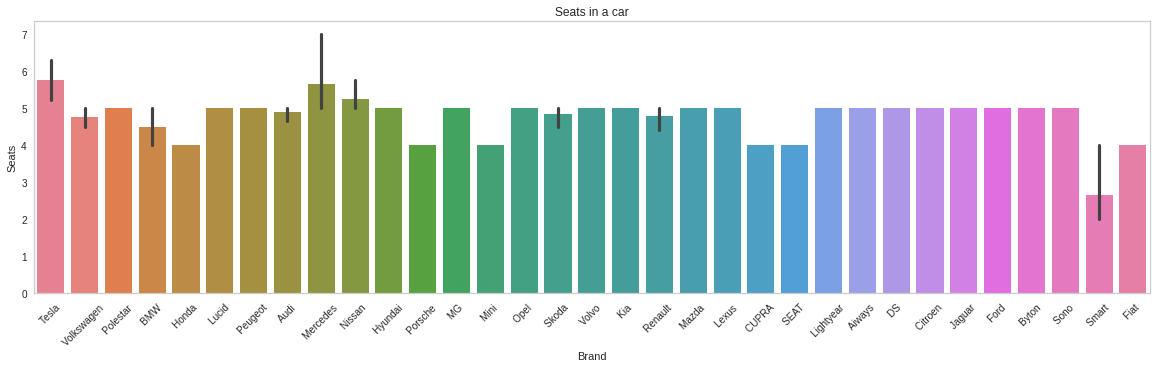

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

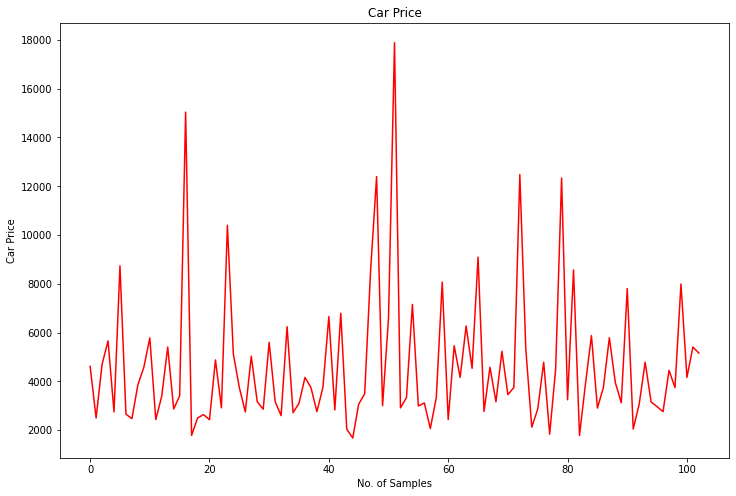

In [ ]:
df['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

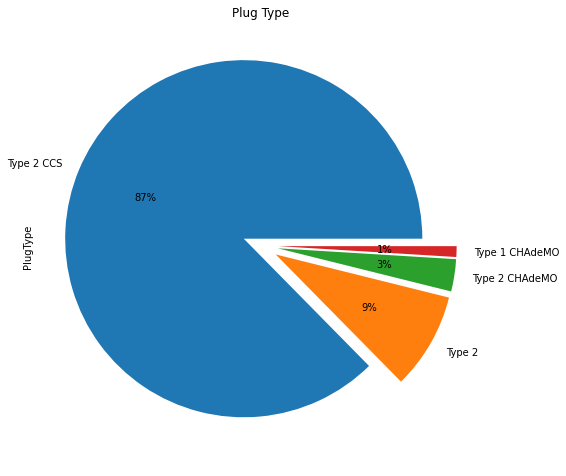

In [ ]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')
plt.show()

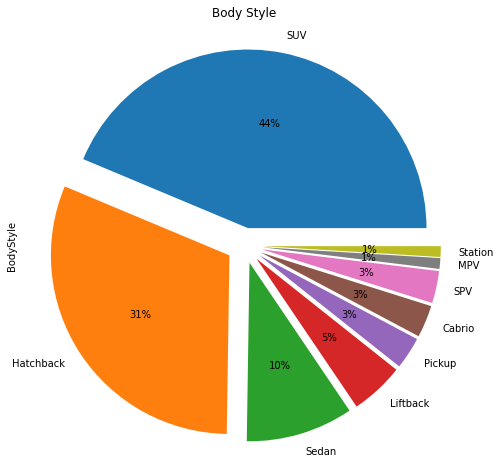

In [ ]:
# Cars and their body type
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')
plt.show()

Text(0.5, 1.0, 'Seats')

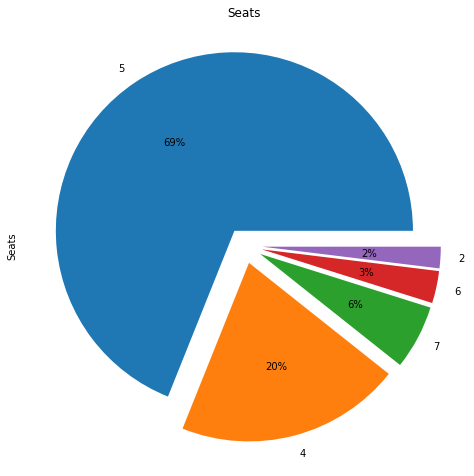

In [ ]:
#No of seats
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

In [ ]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

In [ ]:
fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)

Byton , Fiat and smart are the prominent brands and Polestar being the least


## Top speeds achieved by the cars of a brand

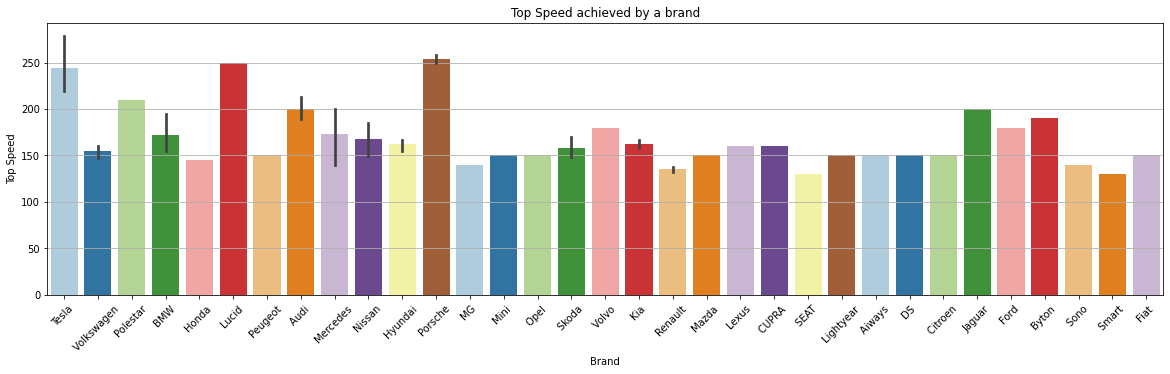

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest


## Range a car can achieve

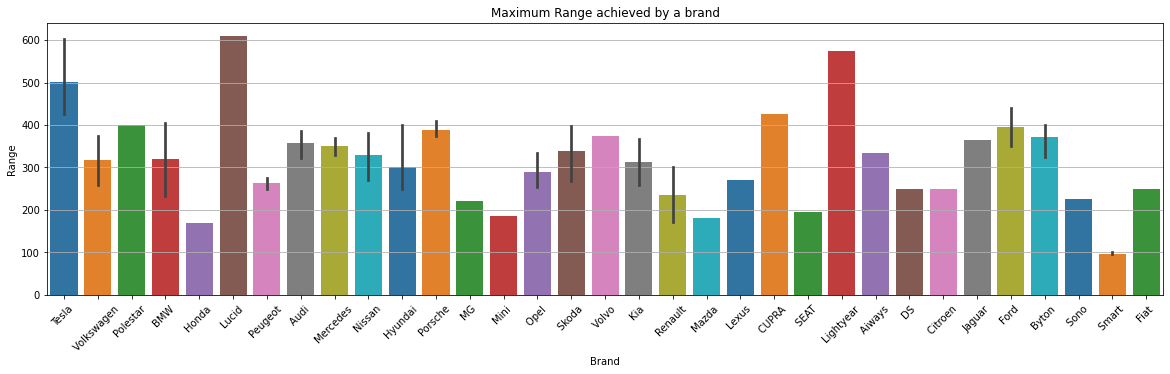

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show()

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

## Car efficiency

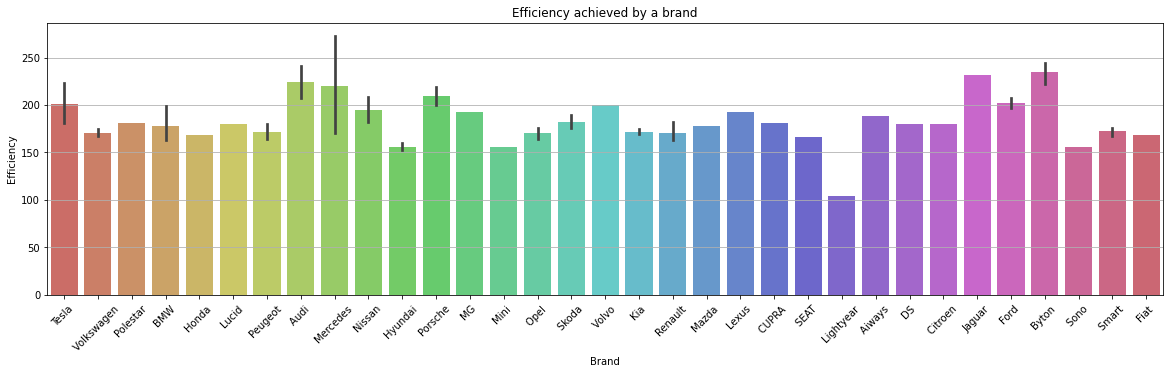

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
plt.show()

Byton , Jaguar and Audi are the most efficient and Lightyear the least




## Price of cars (in INR)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

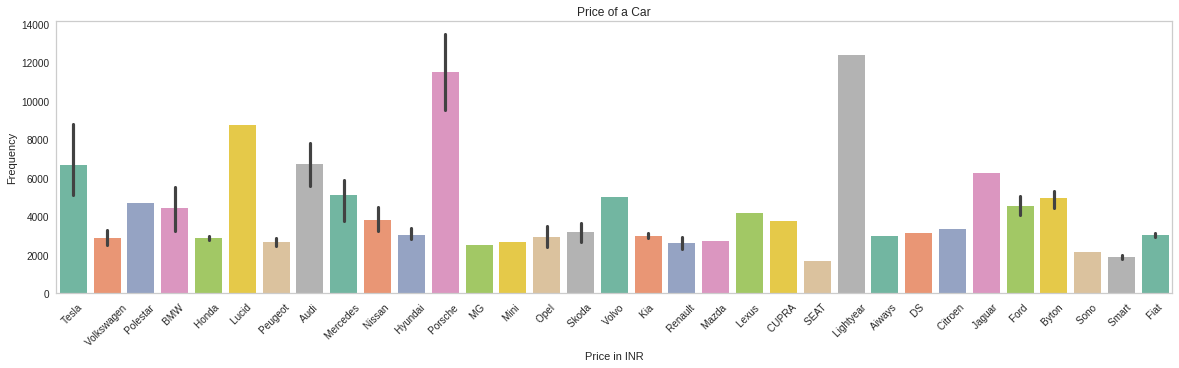

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

## Type of Plug used for charging

Text(0.5, 1.0, 'Seats')

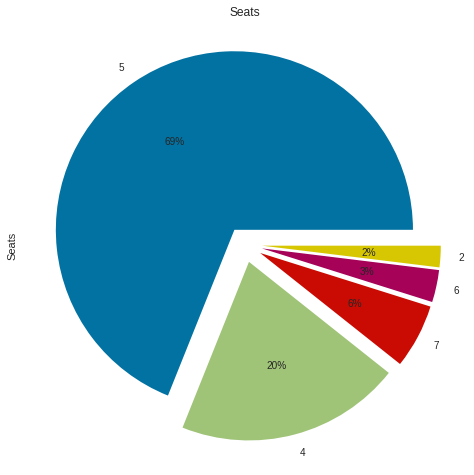

In [ ]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

#Top speed by range

In [ ]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [ ]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

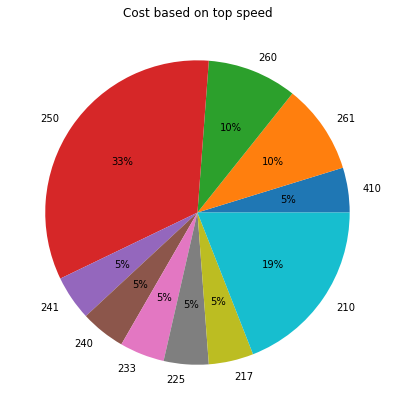

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

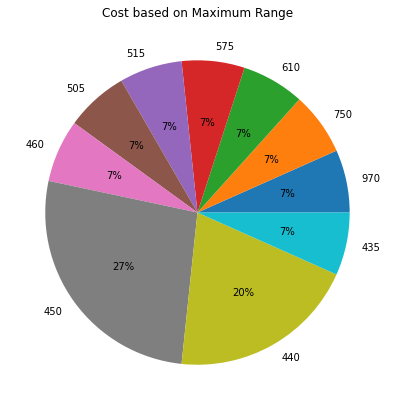

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()

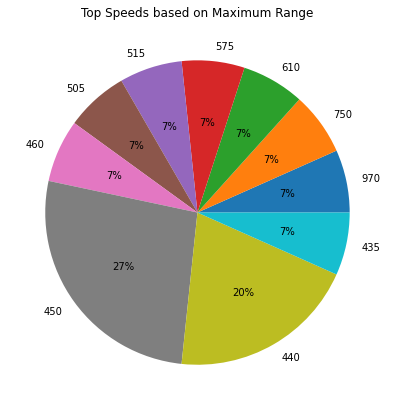

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

# Regression

## Putting independent variables as x and dependent variable as y

In [ ]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

## Finding out the linear regression using OLS method

In [ ]:
import statsmodels.api as sm
x= sm.add_constant(x)
results = sm.OLS(y,x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



## Fitting the model and summarizing

In [ ]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.57e-24
Time:                        12:02:11   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     -4.324      0.000    -1.5e+05   -5.58e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain       5235.8309   2956.235      1.771      0.080    -632.248    1.11e+04
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

1. Standard Errors assume that the covariance matrix of the errors is correctly specified.
2. The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

Only Top Speed and Efficieny are the two variables related to price

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

## Finding out the R-squared value

In [ ]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

78.77072380232661


Around 78% of the dependant variable has been explained by the independant variables

In [ ]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Confusion Matrix of the regression

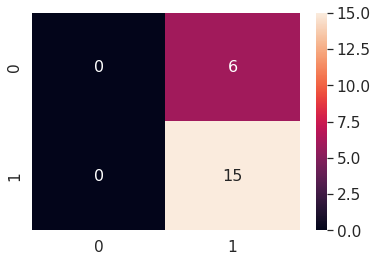

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, pred1)
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Clustering

In [ ]:
X = df1.iloc[:,df1.columns!='Make']
encoding = {"Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }
obj_df = X.replace(encoding)
obj_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


In [ ]:
X_scaled = StandardScaler().fit_transform(obj_df)
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = X_scaled.to_numpy()
X_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

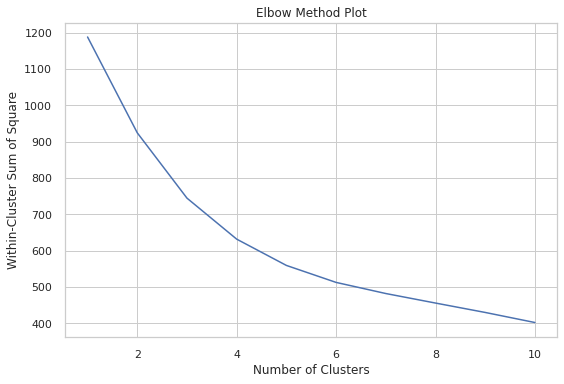

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [ ]:
#k = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])
final_data = pd.concat([df1,y_df],axis=1) 

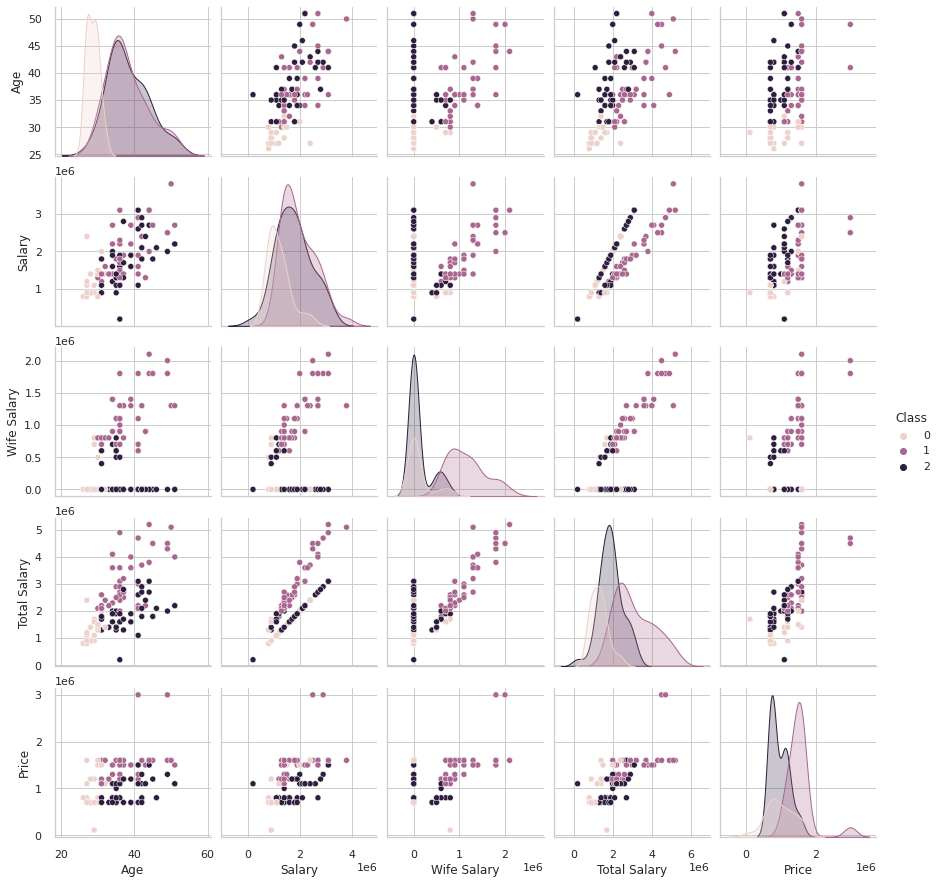

In [ ]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

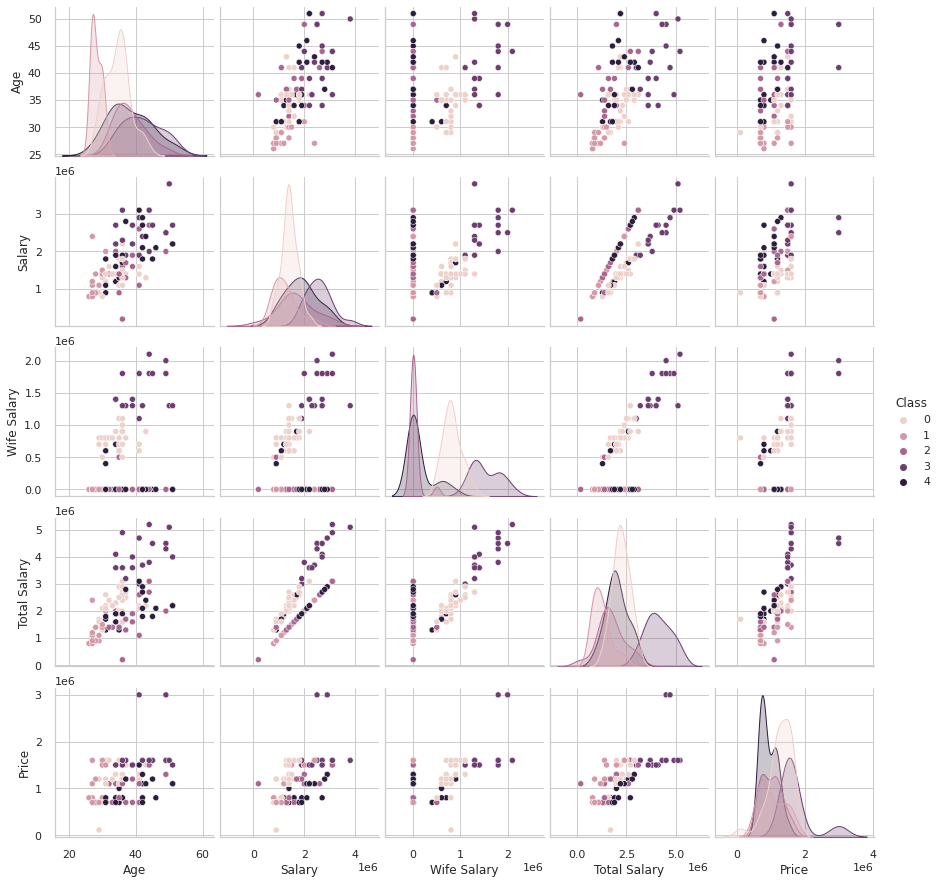

In [ ]:
# for k = 5
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans1.fit(X_scaled)
y1 = kmeans1.predict(X_scaled)
y1_df = pd.DataFrame(y1,columns=['Class'])
final_data1 = pd.concat([df,y1_df],axis=1) 
sns.pairplot(final_data1,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

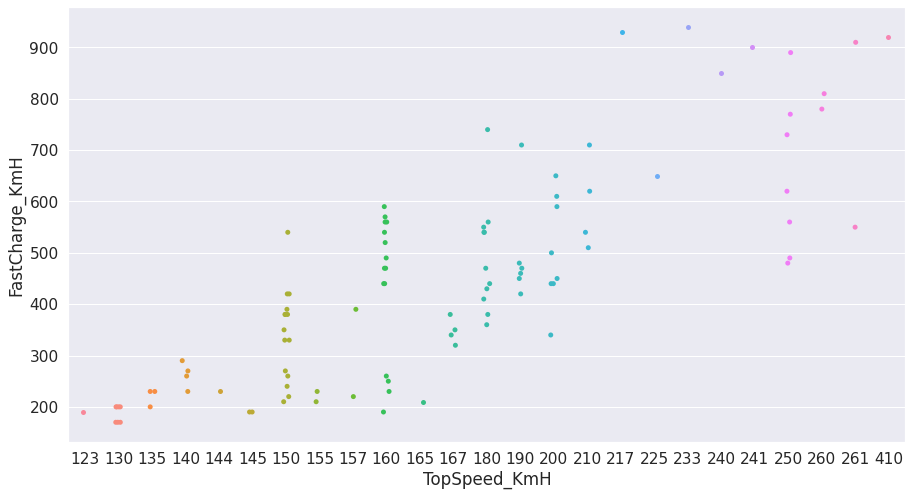

In [ ]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)
plt.show()

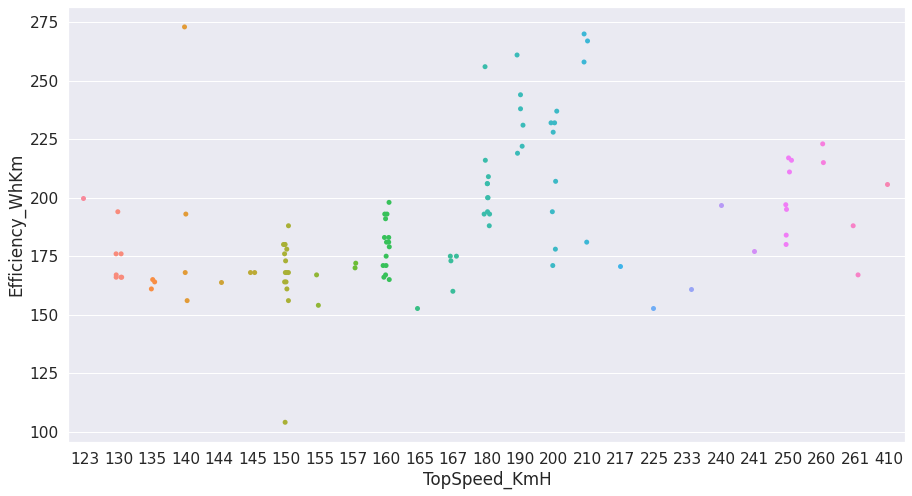

In [ ]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904
...,...,...,...,...,...,...,...,...,...
98,-0.297170,0.446713,-0.463601,0.102542,-0.346005,-0.100457,0.031080,0.202253,0.145390
99,2.335018,0.630747,0.985883,1.560112,-0.817327,-0.121906,0.164115,-0.255651,0.141023
100,0.780642,0.426821,-0.298636,0.708598,0.481728,-0.540071,-0.139753,-0.048733,-0.367509
101,1.540920,0.698754,0.422384,1.094921,-0.298113,-0.307992,-0.363230,0.127251,-0.190397


In [ ]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775


In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.396410,0.086150,0.064757,0.058253,0.144548,0.676910,0.412498,0.270655,-0.324562
PC2,0.421973,-0.216762,0.002272,-0.068523,0.038208,0.045212,0.037576,-0.413810,-0.770777
PC3,0.238316,0.330919,0.571780,0.380475,-0.575143,0.024863,0.004703,0.144167,-0.098954
PC4,0.394519,-0.138428,-0.047650,-0.296483,-0.092366,-0.237914,0.728208,0.358365,0.105702
Pc5,0.157195,0.269920,-0.803300,0.395300,-0.292581,0.086978,0.053875,0.040830,-0.056056
PC6,0.389544,-0.024746,-0.076295,-0.387135,-0.032841,0.364461,-0.520811,0.534180,-0.038015
PC7,0.140425,0.801307,0.019535,-0.428983,0.165256,0.086668,0.098379,-0.320750,0.079999
PC8,0.389779,-0.262265,0.073787,0.179862,0.043293,0.558706,0.118043,-0.382139,0.517207
PC9,0.322888,0.180494,0.098293,0.486554,0.722814,-0.149888,-0.019098,0.265275,-0.033267


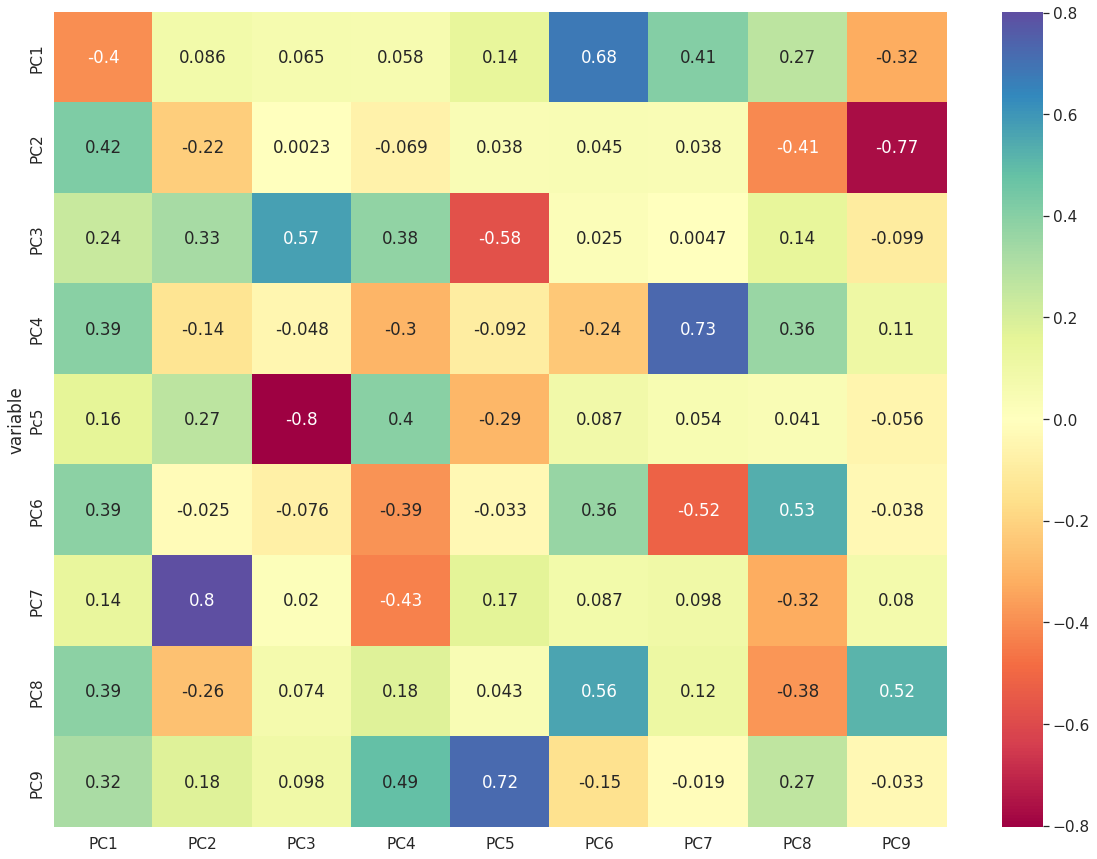

In [ ]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

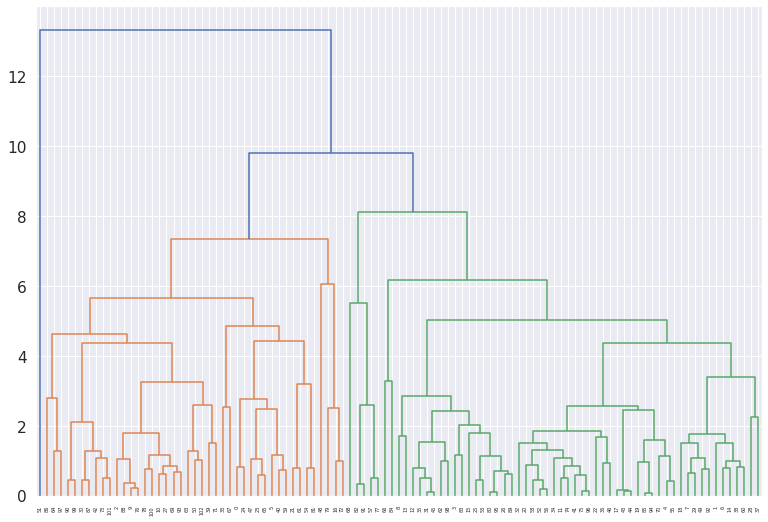

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

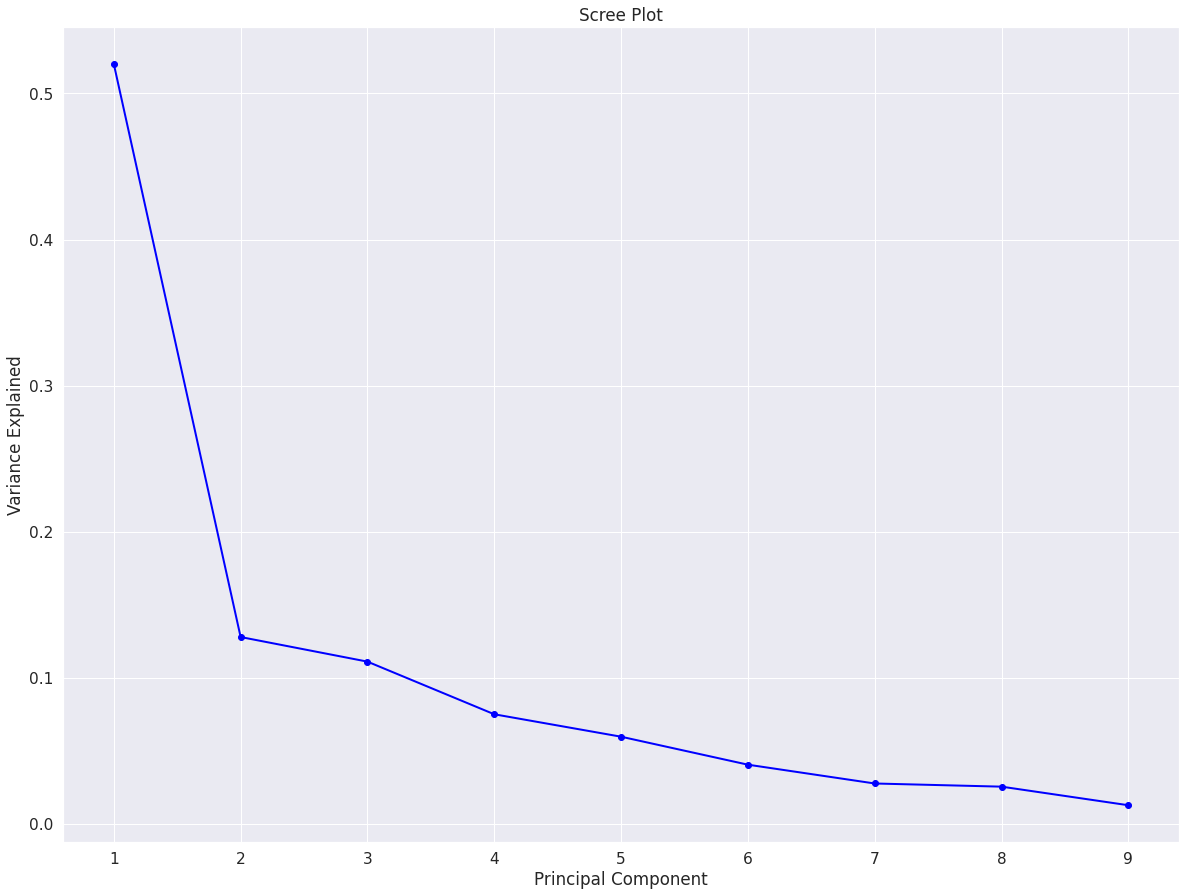

In [ ]:
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

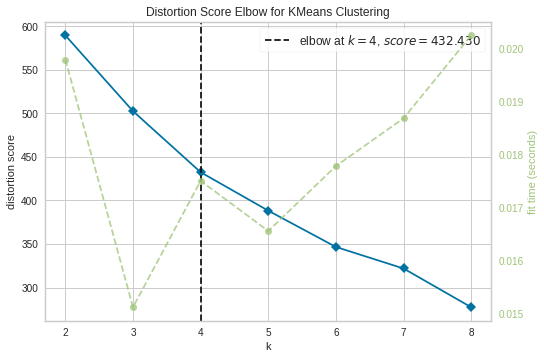

In [ ]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

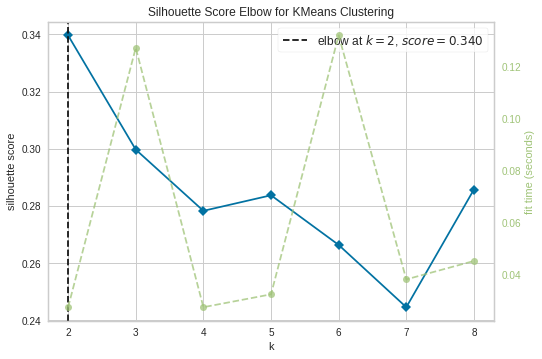

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

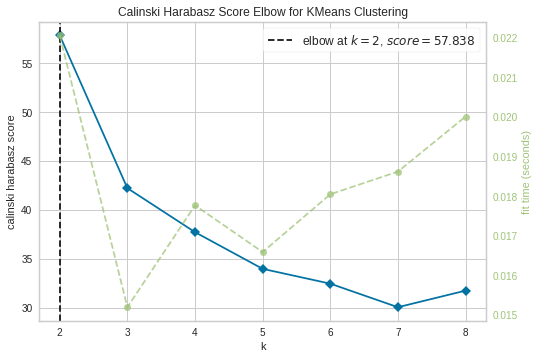

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#K-means clustering 
#standard cluster is 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]
427.88746845173625
5
[[ 3.38080722 -1.38222959 -0.36489344  0.10476922  0.40601443  0.27185359
   0.24199669 -0.10661851  0.04313075]
 [-1.28035008  0.15751337 -0.80380172  0.03882667 -0.26171256  0.0576548
  -0.02518157 -0.04843479 -0.00967151]
 [ 1.47340441  0.75533302  0.44439293  0.22304959  0.00587772 -0.20900642
  -0.04639724  0.13707866  0.00747268]
 [-2.1666201  -0.64972069  1.15112147 -0.52704354  0.24950081  0.04766166
  -0.03574547 -0.05850103 -0.02224405]]


In [ ]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 13, 3: 19, 2: 32, 1: 39})

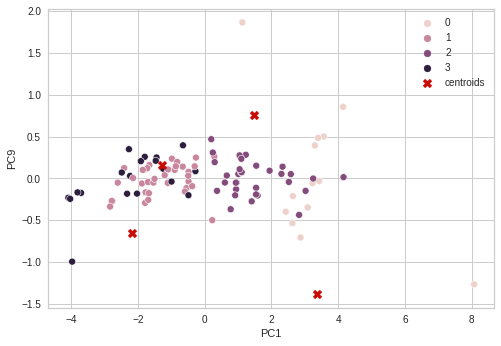

In [ ]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Regression for data2

In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['inr(10e3)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

4643.522050485438


In [ ]:
lm.coef_

array([ 1101.5872075 ,  -741.20904198,   208.53617452,   508.32245827,
         122.35330123,  1579.00685826,   333.61147115, -1079.99511501,
        1461.7226913 ])

In [ ]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [ ]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,1101.587208
PC2,-741.209042
PC3,208.536175
PC4,508.322458
Pc5,122.353301
PC6,1579.006858
PC7,333.611471
PC8,-1079.995115
PC9,1461.722691


In [ ]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [ ]:
y_test

37     3744.0000
1      2496.0000
69     5233.2800
80     3243.7184
92     3064.8384
61     5459.5840
85     2903.6800
53     3328.0000
88     3952.0000
32     2594.5088
6      2654.0800
71     3744.0000
43     2041.2288
16    15040.9792
50     6609.8240
31     3170.3360
97     4451.2000
14     2866.9888
25     3744.0000
51    17888.0000
21     4877.1840
3      5660.9280
84     5876.4992
57     2062.5280
48    12396.8000
47     8565.0240
79    12338.6432
58     3328.0000
2      4695.8080
13     5408.0000
45     3064.8384
89     3120.0000
41     2826.3872
23    10400.0000
26     2745.6000
22     2912.0000
94     3153.2800
27     5028.3584
20     2424.9472
66     2766.0672
30     5604.1856
35     3098.1184
Name: inr(10e3), dtype: float64

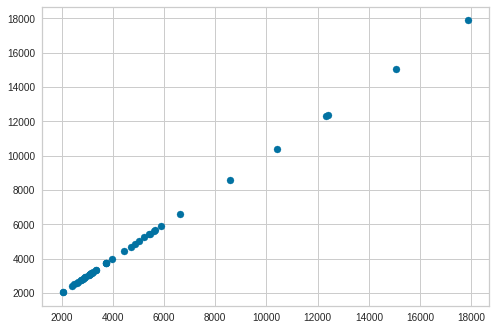

In [ ]:
plt.scatter(y_test, predictions)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
